## Original CNN

Implementation of a Convolutional Neural Network (CNN) using TensorFlow for the animals dataset. The dataset used to train this model contains 90 classes of animals and about 5000 images with the background removed. This model is trained using three convolutional layers with max pooling and dropout layers. The model is trained using the Adam optimizer and the categorical crossentropy loss function. The model is trained for 25 epochs with a batch size of 50. This model achieves an accuracy of 0.33 on the validation set.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import zipfile
import pathlib
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# used for mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# each image is an array of individual img arrays :o
import pathlib
full_path = os.path.abspath("/content/drive/MyDrive/DataMiningProject/animals.zip")
data_dir = tf.keras.utils.get_file('animals.zip', f'file://{full_path}', extract=True)

parent_dir = pathlib.Path(data_dir).with_suffix('').parent
data_dir = parent_dir / 'animals'
print(data_dir)

/root/.keras/datasets/animals


In [ ]:
batch_size = 50
img_height, img_width = 128, 128

training_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
testing_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)


Found 5419 files belonging to 90 classes.
Using 4607 files for training.
Found 5419 files belonging to 90 classes.
Using 812 files for validation.


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
class_names = train_ds.class_names
num_classes = len(class_names)

# declare model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Found 5419 files belonging to 90 classes.
Using 812 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
93/93 [==============================] - 2s 23ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 7.8417 - val_accuracy: 0.3645
Epoch 2/25
93/93 [==============================] - 2s 22ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 7.6423 - val_accuracy: 0.3621
Epoch 3/25
93/93 [==============================] - 2s 26ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 7.6934 - val_accuracy: 0.3584
Epoch 4/25
93/93 [==============================] - 2s 25ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 7.6139 - val_accuracy: 0.3596
Epoch 5/25
93/93 [==============================] - 2s 21ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 7.7045 - val_accuracy: 0.3571
Epoch 6/25
93/93 [==============================] - 1s 15ms/step - loss: 9.3124e-04 - accuracy: 0.9998 - val_loss: 7.9562 - val_accuracy: 0.3645
Epoch 7/25
93/93 [==============================] - 1s 15ms/step - loss: 9.3721e-04 - accuracy: 0.9998 - val_loss: 7.8442 - val_accuracy: 0.3596
Epoch

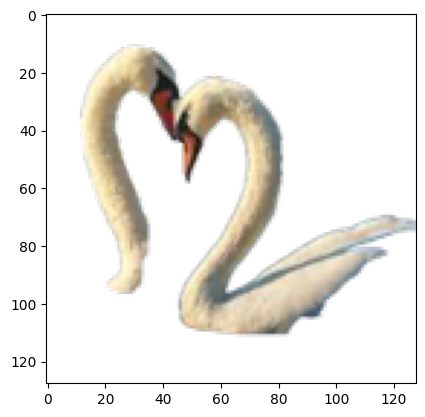

In [ ]:
parent_dir = pathlib.Path(data_dir).with_suffix('').parent
data_dir = parent_dir / 'animals'
imgPath = f'{str(data_dir)}/swan/85a97b4275.png'

img = mpimg.imread(imgPath) #Replace "image.jpg" with the path of your image
plt.imshow(img)

In [ ]:
img = tf.keras.utils.load_img(imgPath, target_size=(img_height, img_width))
img_array = tf.expand_dims(img, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely a(n) {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 24ms/step
This image is most likely a(n) swan with a 100.00 percent confidence.
